In [98]:
import time
import warnings
warnings.filterwarnings("ignore")

### Solution:
### 1. Load the data using read_csv function from pandas package

In [ ]:
import pandas as pdimport time
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Toxicity.csv', encoding='utf8')
df.head()

## 2. Get the comments into a list, for easy text cleanup and manipulation

In [14]:
comment_text = df['comment_text'].to_list()

## 3. Cleanup:

In [15]:
# 1. Using regular expressions, remove IP addresses

import re

rule_ip = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

comment_text = [re.sub(rule_ip, '', text) for text in comment_text]

In [16]:
# 2. Using regular expressions, remove URLs

rule_url = ("((http|https|http://www.|https://www.|www.))" +
             "[a-zA-Z0-9@:%._\\+~#?&//=]" +
             "{2,256}\\.[a-z]" +
             "{2,6}\\b([-a-zA-Z0-9@:%" +
             "._\\+~#?&//=]*)")

comment_text = [re.sub(rule_url, '', text) for text in comment_text]

In [17]:
# 3. Normalize the casing

comment_text = [text.lower() for text in comment_text]

In [18]:
# 4. Tokenize using word_tokenize from NLTK

from nltk.tokenize import word_tokenize

comment_text_tokens = [word_tokenize(text) for text in comment_text]

In [19]:
# 5. & 6. Remove stop words and punctuation

from nltk.corpus import stopwords
import string

sw = stopwords.words('english')
punc = list(string.punctuation)
sw_custom = ["must", "would", 'could', "'s", "n't", "'m", "'re", "'ve", "'ll", "'d", "''", '``','...','•','—',]

print(sw, "\n\n", punc, "\n\n", sw_custom)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
sw_punc = sw + punc + sw_custom

comment_text_cleaned = []
for item in comment_text_tokens:
    cleaned_text = [word for word in item if ((word not in sw_punc and word.isascii()) and not word.isnumeric())]
    comment_text_cleaned.append(cleaned_text)

In [23]:
# Let us check if any non-alphabatic characters are present in cleaned text data

comment_text_check = []
for item in comment_text_cleaned:
    for word in item:
        if not word.isalpha():
            comment_text_check.append(word)
print(comment_text_check)

['drama-prone', 'ludwigs2', '1992.', 'b.', '2010.', 'non-profit', 'k.', 'deceased/former', 'yes/', 'e.g', 'mention.', '==', '150,000', '==', 'titt-fucking', '|talk', '22:56', '=19680608', '=rgcxaaaaibaj', '=mweeaaaaibaj', '=2025,668035', '=7442', '=1bf779fbde1fec4673e3ec6b631deb7f', 'as-yet-uncomfirmed-by-the-bbc', "y'know", '15:47', "'personal", 'his/her', 'source.', 'nominations/grootegeluk', 'nominations/giovan', 're-reviews', 'me/breathe', 'isp-issued', 'isp-issued', 'indian_name', 'stub-sorting', 'uk-struct-stub', 'uk-geo-stub', 'struct-stub', '|hello', '00:32', 'poco*4', '65th', '65th', 'col.', '2.', 'col.', '3.', 'ee.uu..', 'it.', '08:57', '90/91', '1990.', '1985.', '..=', '10+', 'recently-filed', 'arbitration/requests', 'arbitration/requests', 'option-shift-hyphen', 'non-english', 'non-english', 'lot.', 'and/or', 'season_2.3a_2006', 'vs.', 'vs.', 'talkie-talkie', 're-reading', '7:22', 'rock/heavy', 'sino-tibetans', 'u.s.', '4.', '5.', 'elf-masher', '..do', 'language/wikipedia',

## We can see from above output that we need to perform following additional task for more text cleaning:

Replace following characters "-", "_", "/", "+" with " "
Replace "." "," "|" ":" "=", "'", "~", "^", "\", "0-9" and "\" with ""

In [24]:
comment_text_cleaned1 = []
for item in comment_text_cleaned:
    cleaned_text = re.sub('[-+_/]', ' ', " ".join(item))
    cleaned_text = re.sub("[.,|:='~^0-9\\\]", "", cleaned_text)
    comment_text_cleaned1.append(cleaned_text)

In [25]:
comment_text_check = []

for item in comment_text_cleaned1:
    for word in word_tokenize(item):
        if not word.isalpha():
            comment_text_check.append(word)
print(comment_text_check)

['poco*', '*read*', '****', '****ing', '****', 'd*', '*yes', 'f*ck', 'f***ing', 'f***ing', 'f*cking', 'f*cking', '*not*', '*hugs*', '*more*', 'f***', 'f***', 'c***s', 'c***s', 'fu*kwit', 'f*cking', '*accidental*', '*once*', '*both*', 'gfdl*', '*nix', '*nix', 'notice***', '*might*', '*uses*', '*quantum', 'mechanical*', '*no*', '*indeed*', '*again*', 'duty**', '**controversy', 'f***ing', 'm*a*s*h', 'f*cking', '*i', '*goes', 'looks*', '****ing', '****', '*is*', '*legendary*', '*', '*', '*his*', '*the', '*snicker', 'sigh*', '*septegram*talk*contributions*', '*are*', '*do*']


## We have cleaned our text data completely. Lets move to next step.

In [26]:
# 7. Define a function to perform all these steps, you’ll use this later on the actual test set

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

sw_custom = ["must", "would", 'could', "'s", "n't", "'m", "'re", "'ve", "'ll", "'d", "''", '``','...','•','—',]
sw_punc = stopwords.words('english') + list(string.punctuation) + sw_custom
   
def clean_text(text):
    # Using regular expressions, remove IP addresses
    rule_ip = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    text_data_ip_rem = re.sub(rule_ip, '', text)

    # Using regular expressions, remove URLs
    rule_url = ("((http|https|http://www.|https://www.|www.))" +
                 "[a-zA-Z0-9@:%._\\+~#?&//=]" +
                 "{2,256}\\.[a-z]" +
                 "{2,6}\\b([-a-zA-Z0-9@:%" +
                 "._\\+~#?&//=]*)")
    text_data_ip_url_rem = re.sub(rule_url, '', text_data_ip_rem)

    # Normalize the casing
    text_data_normalized = text_data_ip_url_rem.lower()

    # Tokenize using word_tokenize from NLTK
    text_data_tokens = word_tokenize(text_data_normalized)

    # Remove stopwords and punctuations
    text_data_sw_removed = [word for word in text_data_tokens 
                         if ((word not in sw_punc and word.isascii()) and not word.isnumeric())]

    # Further cleaning text data
    text_data_string = " ".join(text_data_sw_removed)
    text_data_string1 = re.sub('[-+_/]', ' ', text_data_string)
    text_data_cleaned = re.sub("[.,|:='~^0-9\\\]", "", text_data_string1)
    return text_data_cleaned

## 4. Using a counter, find the top terms in the data.

Can any of these be considered contextual stop words?
Words like “Wikipedia”, “page”, “edit” are examples of contextual stop words
If yes, drop these from the data

In [27]:
import nltk

comment_text_cleaned_merged = []
for item in comment_text_cleaned1:
    comment_text_cleaned_merged = comment_text_cleaned_merged + item.split()

comment_freq = nltk.FreqDist(comment_text_cleaned_merged)

In [28]:
comment_freq.most_common(200)

[('article', 1732),
 ('page', 1530),
 ('wikipedia', 1442),
 ('talk', 1211),
 ('please', 1042),
 ('ass', 990),
 ('fuck', 908),
 ('one', 879),
 ('like', 845),
 ('also', 658),
 ('see', 631),
 ('think', 630),
 ('know', 596),
 ('edit', 581),
 ('people', 554),
 ('use', 554),
 ('name', 544),
 ('may', 534),
 ('articles', 493),
 ('time', 488),
 ('user', 439),
 ('thanks', 436),
 ('even', 404),
 ('well', 403),
 ('deletion', 394),
 ('information', 393),
 ('make', 391),
 ('good', 379),
 ('suck', 375),
 ('get', 369),
 ('image', 369),
 ('want', 364),
 ('mexicans', 362),
 ('editing', 353),
 ('help', 350),
 ('wp', 347),
 ('way', 341),
 ('pages', 339),
 ('edits', 338),
 ('thank', 335),
 ('first', 334),
 ('new', 327),
 ('sources', 326),
 ('need', 310),
 ('say', 308),
 ('source', 304),
 ('many', 303),
 ('really', 301),
 ('deleted', 300),
 ('used', 285),
 ('fucking', 283),
 ('work', 281),
 ('section', 280),
 ('go', 276),
 ('find', 272),
 ('discussion', 267),
 ('right', 266),
 ('take', 264),
 ('look', 264),

In [29]:
contextual_stop_words = ['article', 'page', 'pages', 'wikipedia', 'wiki', 'talk', 'please', 'also', 'may', 'edit', 'edits', 
                         'articles', 'user', 'information', 'sources', 'source', 'content', 'wp', 'discussion', 'subject', 
                         'editor', 'editors', 'copyright', 'contributions'] 

In [30]:
# Remove contextual stopwords
   
def remove_contextual_sw(text):
    cleaned_text = [word for word in text.split() if word not in contextual_stop_words]
    return " ".join(cleaned_text)

In [31]:
comment_text_cleaned2 = [remove_contextual_sw(item) for item in comment_text_cleaned1]
df['comment_text_cleaned'] = comment_text_cleaned2
df.head()

,id,comment_text,toxic,comment_text_cleaned
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender barnstar like kayastha lets ...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...


## Performing lemmatization on cleaned text: Since lemmatization will reduce text size by converting each word to its root word
## which will increase code efficiency without impacting its performance much.

In [32]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [33]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def my_lemma(text):
    tokens = word_tokenize(text)    
    pos_tags = nltk.pos_tag(tokens)    
    tokens_lemmed = [wnl.lemmatize(item[0],get_wordnet_pos(item[1])) for item in pos_tags]        
    return " ".join(tokens_lemmed)

In [36]:
df['comment_text_lemmed'] = df['comment_text_cleaned'].apply(lambda x: my_lemma(x))

In [37]:
df.head()

,id,comment_text,toxic,comment_text_cleaned,comment_text_lemmed
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender barnstar like kayastha lets ...,barnstar defender barnstar like kayastha let f...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...,seem unbalanced whatever say mathsci say far e...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...,marya dzmitruk bear minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...,new category honestly think need add category ...


## 5. Separate into train and test sets

1. Use train-test method to divide your data into 2 sets: train and test
2. Use a 70-30 split

In [38]:
from sklearn.model_selection import train_test_split

X = df['comment_text_lemmed']
y  = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 6. Use TF-IDF values for the terms as feature to get into a vector space model

1. Import TF-IDF vectorizer from sklearn
2. Instantiate with a maximum of 4000 terms in your vocabulary
3.Fit and apply on the train set
4. Apply on the test set

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(ngram_range=(1,1),stop_words= None)

X_train_vec = tfidf_model.fit_transform(X_train)

In [40]:
print(tfidf_model.get_feature_names())

['aa', 'aacd', 'aaiha', 'aajonus', 'aaron', 'aarticles', 'abacha', 'aback', 'abandon', 'abandonment', 'abbas', 'abbe', 'abbreviate', 'abbreviation', 'abc', 'abdi', 'abduct', 'abdul', 'abel', 'abhira', 'abhishikt', 'abide', 'ability', 'abir', 'abit', 'ablation', 'able', 'aboard', 'abolish', 'abomination', 'abondantly', 'aborigine', 'abortion', 'abounds', 'about', 'aboutcivilcom', 'aboutcom', 'above', 'abovementioned', 'abput', 'abpw', 'abras', 'abrasive', 'abridge', 'abridged', 'abriendo', 'abroad', 'abrupt', 'absence', 'absent', 'absolute', 'absolutely', 'absolution', 'absolve', 'absorb', 'absorption', 'absortion', 'abstain', 'abstract', 'absurd', 'abtract', 'abu', 'abul', 'abundance', 'abundant', 'abundantly', 'abuot', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abusiveness', 'abut', 'ac', 'academia', 'academic', 'academical', 'academically', 'academician', 'academy', 'acalamari', 'acanoobic', 'accelerate', 'acceleration', 'accent', 'accentuate', 'accept', 'acceptable', 'accep

In [41]:
print(X_train_vec.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
X_test_vec = tfidf_model.transform(X_test)

In [43]:
X_vec = tfidf_model.transform(X)

In [44]:
print(len(tfidf_model.get_feature_names()))

14789


## 7. Model building: Support Vector Machine

1. Instantiate SVC from sklearn with a linear kernel
2. Fit on the train data
3. Make predictions for the train and the test set

In [54]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=1)

In [55]:
clf.fit(X_train_vec, y_train)

SVC(kernel='linear', random_state=1)

In [56]:
y_train_pred = clf.predict(X_train_vec)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
y_test_pred = clf.predict(X_test_vec)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
clf.score(X_train_vec, y_train)*100

98.25714285714285

In [59]:
clf.score(X_test_vec, y_test)*100

93.86666666666666

## 8. Model evaluation: Accuracy, recall, and f1_score

1. Report the accuracy on the train set
2. Report the recall on the train set:decent, high, low?
3. Get the f1_score on the train set

In [60]:
# import libraries for metrics and reporting
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_train, y_train_pred)*100

98.25714285714285

## As we observe above SVM classifier model accuracy for train data set is 98.22%

In [62]:
print(classification_report(y_train, clf.predict(X_train_vec)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       1.00      0.80      0.89       306

    accuracy                           0.98      3500
   macro avg       0.99      0.90      0.94      3500
weighted avg       0.98      0.98      0.98      3500



### recall value for class '0' is 1 (very high) but for class '1' is 0.80 (very low compared to recall value for class 0).

Similarly f1-score value for class '0' is 0.99 (very high) but for class '1' is 0.89 (low compared to recall value for class 0).

In [63]:
print(classification_report(y_test, clf.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1369
           1       0.90      0.34      0.49       131

    accuracy                           0.94      1500
   macro avg       0.92      0.67      0.73      1500
weighted avg       0.94      0.94      0.93      1500



### 9. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s

Adjust the appropriate parameter in the SVC module
Solution: REF: https://chrisalbon.com/code/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

In support vector machines, C is a hyperparameter determining the penalty for misclassifying an observation. One method for handling imbalanced classes in support vector machines is to weight C by classes, so that image.png where C is the penalty for misclassification, wj is a weight inversely proportional to class j’s frequency, and Cj is the C value for class j.

The general idea is to increase the penalty for misclassifying minority classes to prevent them from being “overwhelmed” by the majority class. In scikit-learn, when using SVC we can set the values for Cj automatically by setting class_weight='balanced'. The balanced argument automatically weighs classes such that: image-2.png where wj is the weight to class j, n is the number of observations, nj is the number of observations in class j, and k is the total number of classes.

In [64]:
clf1 = SVC(kernel='linear', class_weight='balanced', random_state=1)

### 10. Train again with the adjustment and evaluate

1. Train the model on the train set
2. Evaluate the predictions on the validation set: accuracy, recall, f1_score

In [65]:
clf1.fit(X_train_vec, y_train)
print(classification_report(y_train, clf1.predict(X_train_vec)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3194
           1       0.97      1.00      0.98       306

    accuracy                           1.00      3500
   macro avg       0.98      1.00      0.99      3500
weighted avg       1.00      1.00      1.00      3500



In [66]:
print(classification_report(y_test, clf1.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1369
           1       0.74      0.43      0.54       131

    accuracy                           0.94      1500
   macro avg       0.84      0.71      0.75      1500
weighted avg       0.93      0.94      0.93      1500



In [67]:
accuracy_score(y_train, clf1.predict(X_train_vec))*100

99.68571428571428

In [68]:
clf1.score(X_test_vec, y_test)*100

93.66666666666667

### We can see that after setting class_weight='balanced' our model performance has improved with better recall and f1-score

11. Hyperparameter tuning

1. Import GridSearch and StratifiedKFold (because of class imbalance)
2. Provide the parameter grid to choose for ‘C’
3. Use a balanced class weight while instantiating the Support Vector Classifier
4. Solution: StratifiedKFolds is a cross-validator and provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
clf2 = SVC(kernel='linear', class_weight='balanced', random_state=1)

In [72]:
param_grid = {
    'C':[1, 5, 10,15,20],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001]
}

In [73]:
gs = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=3)

In [74]:
gs.fit(X_vec,y)

GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=1),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [75]:
gs.best_params_

{'C': 1, 'gamma': 1}

In [76]:
gs.best_score_*100

94.65997556791163

In [77]:
gs.cv_results_

{'mean_fit_time': array([0.92110761, 0.91179927, 0.9101545 , 0.90618992, 0.90737756,
        0.74888738, 0.77188881, 0.76126146, 0.75625809, 0.76538094,
        0.75381533, 0.75024414, 0.74842517, 0.7533745 , 0.75200208,
        0.75517742, 0.75033768, 0.75031233, 0.75362659, 0.75630649,
        0.75726755, 0.75782736, 0.75363056, 0.75844423, 0.7538956 ]),
 'std_fit_time': array([0.01558106, 0.02150956, 0.01950446, 0.01932245, 0.02308706,
        0.02127083, 0.0336396 , 0.01575221, 0.0208111 , 0.01987444,
        0.02700045, 0.02891687, 0.02953183, 0.03433479, 0.03288582,
        0.03767826, 0.03893531, 0.03825913, 0.0400423 , 0.03129704,
        0.04374436, 0.0462819 , 0.04355755, 0.04165077, 0.04472135]),
 'mean_score_time': array([0.39308755, 0.39321065, 0.39554755, 0.39401269, 0.3934346 ,
        0.31908917, 0.3369813 , 0.32069516, 0.31901455, 0.32142727,
        0.31346488, 0.31357932, 0.31249507, 0.31174278, 0.31472143,
        0.3094066 , 0.30830065, 0.30985085, 0.31138031, 0.31

In [78]:
clf3 = SVC(kernel='linear', C=1, gamma=1)

In [79]:
clf3.fit(X_train_vec, y_train)


SVC(C=1, gamma=1, kernel='linear')

In [80]:
clf3.score(X_train_vec, y_train)*100

98.25714285714285

In [81]:
clf3.score(X_test_vec, y_test)*100

93.86666666666666

### Hyper parameter tuning using GridSearchCV and StratifiedKFold

In [99]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline

t1 = time.time()

# Bundling together all preprocessing steps for text data
def preprocess_text(text):
    return my_lemma(remove_contextual_sw(clean_text(text)))

# Creating pipeline for vectorization and classification model
model = Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1,1),stop_words= None)),
                              ('svc', SVC(kernel='linear', class_weight='balanced', random_state=1))
                             ])

X = df['comment_text'].apply(lambda x: preprocess_text(x))
y = df['toxic']

param_grid = {
    'svc__C':[0.1, 1, 10, 100],
    'svc__gamma':[10, 1, 0.1, 0.01, 0.001]
}

i=1
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
accu_stratified = []

for train_index,test_index in skf.split(X,y):      
    print('\n{} of kfold {}'.format(i, skf.n_splits))    
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    my_model = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring= 'accuracy')
    my_model.fit(Xtrain, ytrain)
    print("Best parameters: ", my_model.best_params_)
    pred=my_model.predict(Xtest)
    print('accuracy_score',accuracy_score(ytest,pred)*100)
    accu_stratified.append(accuracy_score(ytest,pred)*100)
    i+=1
    
# Print the output.
print('\nList of possible accuracy:', accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(accu_stratified), '%')
print('\nMinimum Accuracy:', min(accu_stratified), '%')
print('\nOverall Accuracy:', round(np.mean(accu_stratified),2), '%')
print('\nStandard Deviation is:', round(np.std(accu_stratified),4))

t2 = time.time()
print("\nTime taken: {} seconds".format(round(t2-t1,2)))


1 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
accuracy_score 94.89999999999999

2 of kfold 5
Best parameters:  {'svc__C': 100, 'svc__gamma': 10}
accuracy_score 94.69999999999999

3 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
accuracy_score 94.69999999999999

4 of kfold 5
Best parameters:  {'svc__C': 0.1, 'svc__gamma': 10}
accuracy_score 93.89999999999999

5 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
accuracy_score 94.39999999999999

List of possible accuracy: [94.89999999999999, 94.69999999999999, 94.69999999999999, 93.89999999999999, 94.39999999999999]

Maximum Accuracy That can be obtained from this model is: 94.89999999999999 %

Minimum Accuracy: 93.89999999999999 %

Overall Accuracy: 94.52 %

Standard Deviation is: 0.3487

Time taken: 230.44 seconds


### 12. Find the parameters with the best recall in cross validation

1. Choose ‘recall’ as the metric for scoring
2. Choose stratified 5 fold cross validation scheme
3. Fit on the train set

In [ ]:
t1 = time.time()

# Bundling together all preprocessing steps for text data
def preprocess_text(text):
    return my_lemma(remove_contextual_sw(clean_text(text)))

# Creating pipeline for vectorization and classification model
model = Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1,1),stop_words= None)),
                              ('svc', SVC(kernel='linear', class_weight='balanced', random_state=1))
                             ])

X = df['comment_text'].apply(lambda x: preprocess_text(x))
y = df['toxic']

param_grid = {
    'svc__C':[0.1, 1, 10, 100],
    'svc__gamma':[10, 1, 0.1, 0.01, 0.001]
}

i=1
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
recall_stratified = []

for train_index,test_index in skf.split(X,y):      
    print('\n{} of kfold {}'.format(i, skf.n_splits))    
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    my_model = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring= 'recall')
    my_model.fit(Xtrain, ytrain)
    print("Best parameters: ", my_model.best_params_)
    pred=my_model.predict(Xtest)
    recall_value = round(classification_report(ytest, pred, output_dict=True)['weighted avg']['recall']*100,2)
    print('Recall_value: ', recall_value)
    recall_stratified.append(recall_value)
    i+=1
    
# Print the output.
print('\nList of possible Recall_value:', recall_stratified)
print('\nMaximum Recall_value That can be obtained from this model is:', max(recall_stratified), '%')
print('\nMinimum Recall_value:', min(recall_stratified), '%')
print('\nOverall Recall_value:', round(np.mean(recall_stratified),2), '%')
print('\nStandard Deviation is:', round(np.std(recall_stratified),4))

t2 = time.time()
print("\nTime taken: {} seconds".format(round(t2-t1,2)))


1 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  94.9

2 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  95.3

3 of kfold 5


### 13. What are the best parameters?

Solution: We can see from above output that best parameters to get optimum Recall value (95.3%) are:

. Best parameters: {'C': 1, 'gamma': 10}
14. Predict and evaluate using the best estimator

1. Use best estimator from the grid search to make predictions on the test set
2. What is the recall on the test set for the toxic comments?
3. What is the f1_score?

In [85]:
model_final = SVC(kernel='linear', C=1, gamma=10, class_weight='balanced', random_state=1)
model_final.fit(X_train_vec, y_train)
y_test_pred = model_final.predict(X_test_vec)
print("\nModel accuracy with train data: ", model_final.score(X_train_vec, y_train)*100)
print("\nModel accuracy with test data: ", model_final.score(X_test_vec, y_test)*100)
print("\nClassification report with train data:\n", classification_report(y_train, model_final.predict(X_train_vec)))
print("\nClassification report with test data:\n", classification_report(y_test, model_final.predict(X_test_vec)))


Model accuracy with train data:  99.68571428571428

Model accuracy with test data:  93.66666666666667

Classification report with train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3194
           1       0.97      1.00      0.98       306

    accuracy                           1.00      3500
   macro avg       0.98      1.00      0.99      3500
weighted avg       1.00      1.00      1.00      3500


Classification report with test data:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1369
           1       0.74      0.43      0.54       131

    accuracy                           0.94      1500
   macro avg       0.84      0.71      0.75      1500
weighted avg       0.93      0.94      0.93      1500



In [86]:
recall_value_test = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['recall']*100

In [87]:
print("\nModel Recall value with test data: ", recall_value_test)


Model Recall value with test data:  93.66666666666667


In [88]:
f1_score_test = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['f1-score']*100

In [89]:
print("\nModel f1-score with test data: ", f1_score_test)


Model f1-score with test data:  92.88764008018666


### 15. What are the most prominent terms in the toxic comments?

1. Separate the comments from the test set that the model identified as toxic
2. Make one large list of the terms
3. Get the top 15 terms

In [90]:
# Separate the comments from the test set that the model identified as toxic

X_test[y_test_pred==1]

2916    comment west irrelevant well quote nuclear phs...
1513             thing persistant ugly bastard fuck troll
804                         bull fuck shit racist scumbag
3271                                                  eat
2671    stop deleting jont tell ask tell friend go pre...
                              ...                        
719                                            suck twerp
709     san francisco burrito formal hierarchy authori...
3203    hate crime believe category hate crime accepta...
1777                          gay warn gay deletion troll
1433    fuck hate nigger spics jews minority fuck hate...
Name: comment_text_lemmed, Length: 76, dtype: object

In [91]:
text_merged = []
for item in X_test[y_test_pred==1]:
    text_merged = text_merged + item.split()

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

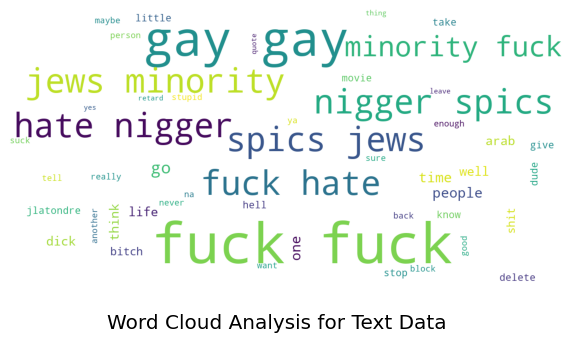

In [93]:
title = 'Word Cloud Analysis for Text Data'
wordcloud = WordCloud(
    background_color='white',
    stopwords=None,
    max_words=50,
    max_font_size=40, 
    scale=3,
    random_state=1 
).generate(" ".join(text_merged))

fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    
plt.imshow(wordcloud);

In [94]:
# Make one large list of the terms

freq_words = nltk.FreqDist(text_merged)
print(freq_words.most_common(100))

[('fuck', 384), ('as', 285), ('gay', 221), ('hate', 90), ('nigger', 79), ('spics', 79), ('jews', 79), ('minority', 79), ('like', 18), ('go', 17), ('get', 14), ('one', 11), ('time', 11), ('arab', 11), ('people', 10), ('na', 9), ('well', 8), ('think', 8), ('life', 8), ('mate', 8), ('dick', 8), ('shit', 7), ('bitch', 7), ('stop', 6), ('dude', 6), ('movie', 6), ('hell', 6), ('know', 6), ('take', 6), ('delete', 6), ('ever', 6), ('give', 6), ('little', 6), ('jlatondre', 6), ('stupid', 5), ('tell', 5), ('really', 5), ('change', 5), ('another', 5), ('good', 5), ('suck', 5), ('block', 5), ('want', 5), ('maybe', 5), ('ya', 5), ('never', 5), ('sure', 5), ('back', 5), ('person', 5), ('enough', 5), ('quote', 4), ('thing', 4), ('leave', 4), ('yes', 4), ('retard', 4), ('look', 4), ('son', 4), ('need', 4), ('reason', 4), ('asshole', 4), ('read', 4), ('ip', 4), ('book', 4), ('try', 4), ('vandalise', 4), ('vandal', 4), ('guy', 4), ('arabic', 4), ('say', 4), ('nobhead', 4), ('ear', 4), ('nothing', 4), ('

In [95]:
# Get the top 15 terms

freq_words.most_common(15)

[('fuck', 384),
 ('as', 285),
 ('gay', 221),
 ('hate', 90),
 ('nigger', 79),
 ('spics', 79),
 ('jews', 79),
 ('minority', 79),
 ('like', 18),
 ('go', 17),
 ('get', 14),
 ('one', 11),
 ('time', 11),
 ('arab', 11),
 ('people', 10)]

### Packing all functions in a pipeline for better organizing code:
Let us create final model with complete data:

In [96]:
model = Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1,1),stop_words= None)),
                              ('svc', SVC(kernel='linear', C=1, gamma=10, class_weight='balanced', random_state=1))
                             ])
final_model = model.fit(X,y)

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!END!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!